# Analysis of FIFA 20 Data Using Classification Models 

In this notebook we will analyse FIFA 20 data and create classification models which aim to predict a player's position (GK, DF, MID or FW) based on other data such as height, weight, value, skill attributes etc. 

## Overview of Data

The dataset contains data about football players from FIFA 20. Each row is a summary of a player's stats with a row for each player. Among the stats you can find age, height, nationality, overall rating and more. The dataset covers 18277 players with 104 different columns relating to their attributes. This dataset was downloaded from Kaggle.

## Cleaning the Data

First we import the necessary libraries

In [614]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\samke\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'cm', 'mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


We then set the option to view all columns and rows of a dataset and save the data as a DataFrame named 'df':

In [615]:
pd.set_option('max_columns', None) #View all columns in dataset
pd.set_option('max_rows', None) #View all rows in dataset
df = pd.read_csv('players_20.csv') 
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

We want to extract only the columns we think are relevant for predicting a player's position so we create a DataFrame of the columns of the dataset so that we can easily view the index number of each column:

In [616]:
cols = df.columns.tolist()
df_col = pd.DataFrame(cols)
df_col

,0
0,sofifa_id
1,player_url
2,short_name
3,long_name
4,age
5,dob
6,height_cm
7,weight_kg
8,nationality
9,club


We then create a new dataframe consisting of columns that we believe to be relevant for the analysis. Namely, the player's height, weight, overall rating, potential rating, value, wage, and various skill attribute ratings. We also include the player's team position as the target variable. 

In [617]:
df2 = pd.concat([df.iloc[:,6:8], df.iloc[:,10:12], df.iloc[:,12:14], df.iloc[:,17:19], df.iloc[:,44:78], df.iloc[:,24]], axis = 1)
df2.head()

,height_cm,weight_kg,overall,potential,value_eur,wage_eur,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,team_position
0,170,72,94,94,95500000,565000,4,4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,RW
1,187,83,93,93,58500000,405000,4,5,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,LW
2,175,68,92,92,105500000,290000,5,5,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,CAM
3,188,87,91,93,77500000,125000,3,1,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,GK
4,175,74,91,91,90000000,470000,4,4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,LW


We can then look into the value counts of our target variable (which we have now renamed to 'pos' to make things easier):

In [618]:
df2 = df2.rename(columns = {'team_position' : 'pos'})
df2.pos.value_counts()

SUB    7820
RES    2958
GK      662
LCB     660
RCB     660
RB      560
LB      560
ST      458
LCM     411
RCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
LS      195
RS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
LWB      58
RWB      58
LAM      23
RAM      23
LF       19
RF       19
CF       14
Name: pos, dtype: int64

We remove player entries that are classified as a substitute or reserve as we don't know the actual position of these players and we are not interested in determining whether a player is a substitute or reserve.  

In [619]:
df3 = df2[df2['pos'] != 'SUB']
df3 = df3[df3['pos'] != 'RES']
df3.reset_index(inplace = True)

In [620]:
df3.pos.value_counts()

GK     662
LCB    660
RCB    660
RB     560
LB     560
ST     458
LCM    411
RCM    411
RM     399
LM     398
CAM    311
RDM    244
LDM    242
RS     195
LS     195
CDM    181
LW     162
RW     161
CB     100
CM      76
LWB     58
RWB     58
LAM     23
RAM     23
LF      19
RF      19
CF      14
Name: pos, dtype: int64

Before we think about grouping these we should check to see if we have any null values:

In [621]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   index                       7500 non-null   int64 
 1   height_cm                   7500 non-null   int64 
 2   weight_kg                   7500 non-null   int64 
 3   overall                     7500 non-null   int64 
 4   potential                   7500 non-null   int64 
 5   value_eur                   7500 non-null   int64 
 6   wage_eur                    7500 non-null   int64 
 7   weak_foot                   7500 non-null   int64 
 8   skill_moves                 7500 non-null   int64 
 9   attacking_crossing          7500 non-null   int64 
 10  attacking_finishing         7500 non-null   int64 
 11  attacking_heading_accuracy  7500 non-null   int64 
 12  attacking_short_passing     7500 non-null   int64 
 13  attacking_volleys           7500 non-null   int6

We can see that there are multiple player entries that have null values for team position so we remove these from the dataset:

In [622]:
df3.dropna(inplace = True)
df3.reset_index(inplace = True)

In [623]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   level_0                     7260 non-null   int64 
 1   index                       7260 non-null   int64 
 2   height_cm                   7260 non-null   int64 
 3   weight_kg                   7260 non-null   int64 
 4   overall                     7260 non-null   int64 
 5   potential                   7260 non-null   int64 
 6   value_eur                   7260 non-null   int64 
 7   wage_eur                    7260 non-null   int64 
 8   weak_foot                   7260 non-null   int64 
 9   skill_moves                 7260 non-null   int64 
 10  attacking_crossing          7260 non-null   int64 
 11  attacking_finishing         7260 non-null   int64 
 12  attacking_heading_accuracy  7260 non-null   int64 
 13  attacking_short_passing     7260 non-null   int6

We now group the player positions into goalkeepers, defenders, midfielders and forwards which are denoted by 0,1,2 and 3 respectively. Note that we could have grouped them into these categories and then used LabelEncoder to encode the values, but this would have encoded them in alphabetical order which doesn't make as much sense in this context. 

In [624]:
for pos in df3['pos']:
    if pos in ['GK']:
        df3['pos'].replace(pos, 0, inplace = True)
    elif pos in ['LCB', 'RCB','CB', 'RB', 'LB', 'RWB', 'LWB']:
        df3['pos'].replace(pos, 1, inplace = True)
    elif pos in ['CM', 'LCM', 'RCM', 'RM', 'LM', 'CAM', 'RAM', 'LAM', 'RDM', 'CDM', 'LDM']:
        df3['pos'].replace(pos, 2, inplace = True)
    elif pos in ['LS', 'RS', 'RW', 'LW', 'CF', 'LF', 'RF', 'ST']:
        df3['pos'].replace(pos, 3, inplace = True)
        


We then use MinMaxScaler in order to scale our dependant variables:

In [625]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
for column in df3.columns.tolist():
    if column == 'pos':
        continue
    else:
        df3[column] = mm.fit_transform(df3[[column]])

In [626]:
round(df3.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
level_0,7260.0,0.500,0.289,0.0,0.250,0.501,0.750,1.0
index,7260.0,0.373,0.250,0.0,0.162,0.341,0.565,1.0
height_cm,7260.0,0.520,0.137,0.0,0.429,0.531,0.612,1.0
weight_kg,7260.0,0.431,0.118,0.0,0.350,0.417,0.500,1.0
overall,7260.0,0.453,0.134,0.0,0.356,0.444,0.533,1.0
potential,7260.0,0.466,0.146,0.0,0.357,0.452,0.548,1.0
value_eur,7260.0,0.037,0.072,0.0,0.005,0.010,0.037,1.0
wage_eur,7260.0,0.021,0.049,0.0,0.002,0.005,0.020,1.0
weak_foot,7260.0,0.503,0.170,0.0,0.500,0.500,0.500,1.0
skill_moves,7260.0,0.373,0.197,0.0,0.250,0.250,0.500,1.0


In [627]:
df3.head()

,level_0,index,height_cm,weight_kg,overall,potential,value_eur,wage_eur,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos
0,0.000000,0.000000,0.285714,0.366667,1.000000,0.976190,0.905213,1.000000,0.75,0.75,0.941860,1.000000,0.732558,1.000000,0.976744,1.000000,0.988636,1.000000,1.000000,1.000000,0.939024,0.858824,0.963415,0.984848,0.988095,0.886076,0.602941,0.728395,0.623377,1.000000,0.440476,0.395349,0.989247,1.000000,0.795181,1.000000,0.322222,0.360465,0.219512,0.056180,0.109890,0.152174,0.146067,0.076923,3
1,0.000133,0.000055,0.632653,0.550000,0.977778,0.952381,0.554502,0.716312,0.75,1.00,0.895349,0.989011,0.953488,0.894118,0.965116,0.913978,0.852273,0.800000,0.819277,0.956044,0.914634,0.941176,0.890244,1.000000,0.702381,1.000000,1.000000,0.851852,0.753247,0.988889,0.619048,0.267442,1.000000,0.858824,0.915663,0.988095,0.266667,0.302326,0.195122,0.067416,0.109890,0.152174,0.146067,0.109890,3
2,0.000267,0.000110,0.387755,0.300000,0.955556,0.928571,1.000000,0.512411,1.00,1.00,0.930233,0.912088,0.639535,0.941176,0.965116,0.989247,0.931818,0.922222,0.867470,0.989011,0.975610,0.917647,1.000000,0.939394,0.857143,0.810127,0.500000,0.802469,0.376623,0.888889,0.476190,0.348837,0.913978,0.952941,0.975904,0.976190,0.255556,0.232558,0.256098,0.089888,0.087912,0.152174,0.157303,0.109890,2
3,0.000400,0.000165,0.653061,0.616667,0.933333,0.952381,0.734597,0.219858,0.50,0.00,0.069767,0.076923,0.093023,0.423529,0.104651,0.086022,0.079545,0.111111,0.373494,0.274725,0.353659,0.576471,0.646341,0.878788,0.440476,0.544304,0.750000,0.308642,0.753247,0.088889,0.273810,0.151163,0.096774,0.658824,0.024096,0.666667,0.255556,0.069767,0.121951,0.966292,1.000000,0.836957,1.000000,0.967033,0
4,0.000533,0.000219,0.387755,0.400000,0.933333,0.904762,0.853081,0.831560,0.75,0.75,0.860465,0.879121,0.627907,0.964706,0.918605,0.978495,0.875000,0.833333,0.891566,0.978022,0.975610,0.905882,0.987805,0.909091,0.976190,0.835443,0.426471,0.839506,0.558442,0.844444,0.511905,0.406977,0.913978,0.941176,0.951807,0.940476,0.333333,0.244186,0.170732,0.112360,0.120879,0.054348,0.078652,0.076923,3


We can see below that our positions are not equally split, with defenders and midfielders having considerably more player entries than goalkeepers and forwards. Therefore we must use StratifiedShuffleSplit to ensure that our training and test data splits have similar ratios.  

In [628]:
df3['pos'].value_counts()

2    2719
1    2656
3    1223
0     662
Name: pos, dtype: int64

In [629]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = df3.columns[:-1]

strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(df3[feature_cols], df3.pos))

X_train = df3.loc[train_idx, feature_cols]
y_train = df3.loc[train_idx, 'pos']

X_test  = df3.loc[test_idx, feature_cols]
y_test  = df3.loc[test_idx, 'pos']

In [630]:
y_train.value_counts(normalize=True)

2    0.374459
1    0.365801
3    0.168438
0    0.091303
Name: pos, dtype: float64

In [631]:
y_test.value_counts(normalize=True)

2    0.374656
1    0.365932
3    0.168503
0    0.090909
Name: pos, dtype: float64

In [632]:
df3.head()

,level_0,index,height_cm,weight_kg,overall,potential,value_eur,wage_eur,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pos
0,0.000000,0.000000,0.285714,0.366667,1.000000,0.976190,0.905213,1.000000,0.75,0.75,0.941860,1.000000,0.732558,1.000000,0.976744,1.000000,0.988636,1.000000,1.000000,1.000000,0.939024,0.858824,0.963415,0.984848,0.988095,0.886076,0.602941,0.728395,0.623377,1.000000,0.440476,0.395349,0.989247,1.000000,0.795181,1.000000,0.322222,0.360465,0.219512,0.056180,0.109890,0.152174,0.146067,0.076923,3
1,0.000133,0.000055,0.632653,0.550000,0.977778,0.952381,0.554502,0.716312,0.75,1.00,0.895349,0.989011,0.953488,0.894118,0.965116,0.913978,0.852273,0.800000,0.819277,0.956044,0.914634,0.941176,0.890244,1.000000,0.702381,1.000000,1.000000,0.851852,0.753247,0.988889,0.619048,0.267442,1.000000,0.858824,0.915663,0.988095,0.266667,0.302326,0.195122,0.067416,0.109890,0.152174,0.146067,0.109890,3
2,0.000267,0.000110,0.387755,0.300000,0.955556,0.928571,1.000000,0.512411,1.00,1.00,0.930233,0.912088,0.639535,0.941176,0.965116,0.989247,0.931818,0.922222,0.867470,0.989011,0.975610,0.917647,1.000000,0.939394,0.857143,0.810127,0.500000,0.802469,0.376623,0.888889,0.476190,0.348837,0.913978,0.952941,0.975904,0.976190,0.255556,0.232558,0.256098,0.089888,0.087912,0.152174,0.157303,0.109890,2
3,0.000400,0.000165,0.653061,0.616667,0.933333,0.952381,0.734597,0.219858,0.50,0.00,0.069767,0.076923,0.093023,0.423529,0.104651,0.086022,0.079545,0.111111,0.373494,0.274725,0.353659,0.576471,0.646341,0.878788,0.440476,0.544304,0.750000,0.308642,0.753247,0.088889,0.273810,0.151163,0.096774,0.658824,0.024096,0.666667,0.255556,0.069767,0.121951,0.966292,1.000000,0.836957,1.000000,0.967033,0
4,0.000533,0.000219,0.387755,0.400000,0.933333,0.904762,0.853081,0.831560,0.75,0.75,0.860465,0.879121,0.627907,0.964706,0.918605,0.978495,0.875000,0.833333,0.891566,0.978022,0.975610,0.905882,0.987805,0.909091,0.976190,0.835443,0.426471,0.839506,0.558442,0.844444,0.511905,0.406977,0.913978,0.941176,0.951807,0.940476,0.333333,0.244186,0.170732,0.112360,0.120879,0.054348,0.078652,0.076923,3


Our data is now ready to train several classification models.

## Fitting the Models

### K-Nearest Neighbour

We first fit the training data to a k-nearest neighbour model using an n_neighbours value of 3, and print a classification report:

In [649]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 6))
print('F1 Score: ', round(f1_score(y_test, y_pred, average = 'weighted'), 6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       0.88      0.86      0.87       797
           2       0.74      0.80      0.77       816
           3       0.76      0.67      0.71       367

    accuracy                           0.82      2178
   macro avg       0.85      0.83      0.84      2178
weighted avg       0.82      0.82      0.82      2178

Accuracy score:  0.817723
F1 Score:  0.817624


Text(0.5, 15.0, 'Actual')

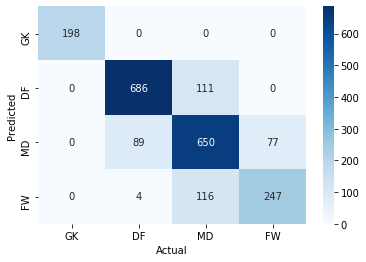

In [640]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap = 'Blues')
ax.set_xticklabels(['GK', 'DF', 'MD', 'FW'])
ax.set_yticklabels(['GK', 'DF', 'MD', 'FW'])
ax.set_ylabel('Predicted');
ax.set_xlabel('Actual')

Whilst a k value of 3 had a respectable accuracy and f-score, we will try to find the optimal value of k: 

In [642]:
max_k = 40
f1_scores = list()
error_rates = list() 

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test, average = 'weighted')
    f1_scores.append((k, round(f1_score(y_test, y_pred, average = 'weighted'), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [643]:
f1_results.head(10)

,K,F1 Score
0,1,0.7785
1,2,0.7785
2,3,0.8196
3,4,0.8216
4,5,0.8368
5,6,0.8335
6,7,0.8421
7,8,0.8440
8,9,0.8456
9,10,0.8456


In [644]:
error_results.head(10)

,K,Error Rate
0,1,0.2218
1,2,0.2218
2,3,0.1804
3,4,0.1786
4,5,0.1630
5,6,0.1662
6,7,0.1579
7,8,0.1556
8,9,0.1543
9,10,0.1543


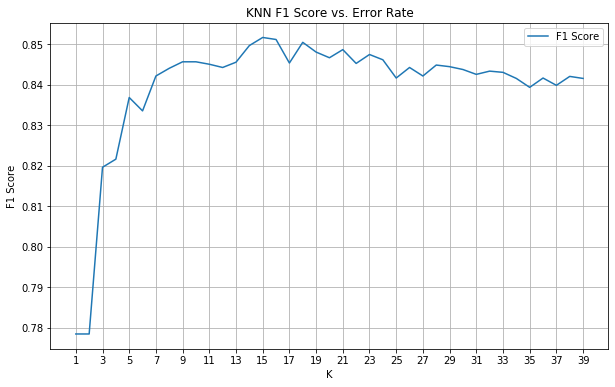

In [645]:
ax = f1_results.set_index('K').plot(figsize = (10,6))
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score vs. Error Rate')
plt.grid()

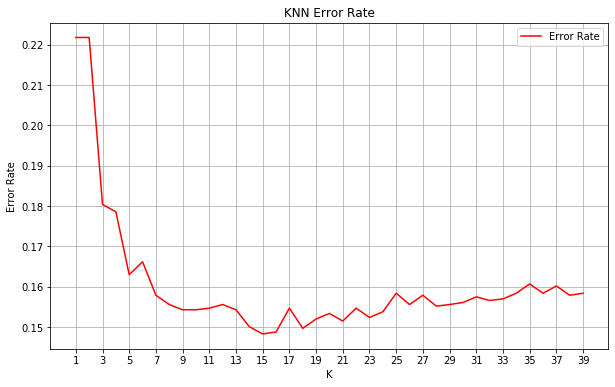

In [646]:
ax = error_results.set_index('K').plot(figsize = (10,6), color = 'r')
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN Error Rate')
plt.grid()

We can see using the elbow method for the f-score and error rate that 15 is the optimal number of clusters for the KNN model. Therefore we can fit the model with this parameter and print a classification report:

In [648]:
knn = KNeighborsClassifier(n_neighbors=15)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 6))
print('F1 Score: ', round(f1_score(y_test, y_pred, average = 'weighted'), 6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       0.92      0.87      0.90       797
           2       0.77      0.87      0.81       816
           3       0.83      0.69      0.75       367

    accuracy                           0.85      2178
   macro avg       0.88      0.86      0.87      2178
weighted avg       0.86      0.85      0.85      2178

Accuracy score:  0.85124
F1 Score:  0.851158


Text(0.5, 15.0, 'Actual')

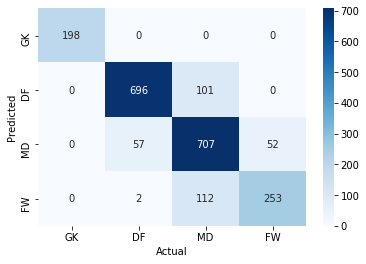

In [582]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap = 'Blues')
ax.set_xticklabels(['GK', 'DF', 'MD', 'FW'])
ax.set_yticklabels(['GK', 'DF', 'MD', 'FW'])
ax.set_ylabel('Predicted');
ax.set_xlabel('Actual')

We can see that the KNN model now has a better f-score.

## Decision Trees

We first fit the training data and view the node count and depth, as well as the classification report and confusion matrix:

In [583]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [584]:
dt.tree_.node_count, dt.tree_.max_depth

(1055, 20)

In [586]:
y_pred = dt.predict(X_test)

In [587]:
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred, average = 'weighted'), 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       0.86      0.82      0.84       797
           2       0.70      0.72      0.71       816
           3       0.66      0.67      0.66       367

    accuracy                           0.78      2178
   macro avg       0.80      0.80      0.80      2178
weighted avg       0.78      0.78      0.78      2178

Accuracy score:  0.78
F1 Score:  0.78


Text(0.5, 15.0, 'Actual')

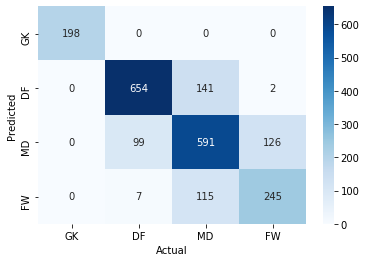

In [588]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap = 'Blues')
ax.set_xticklabels(['GK', 'DF', 'MD', 'FW'])
ax.set_yticklabels(['GK', 'DF', 'MD', 'FW'])
ax.set_ylabel('Predicted');
ax.set_xlabel('Actual')

This model currently performs considerably worse than the previous models so we will aim to optimise it using cross validation:

In [589]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [590]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(179, 7)

In [653]:
y_pred = GR.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 6))
print('F1 Score: ', round(f1_score(y_test, y_pred, average = 'weighted'), 6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       0.87      0.85      0.86       797
           2       0.73      0.76      0.74       816
           3       0.72      0.69      0.71       367

    accuracy                           0.80      2178
   macro avg       0.83      0.82      0.83      2178
weighted avg       0.80      0.80      0.80      2178

Accuracy score:  0.802571
F1 Score:  0.802835


Using cross validation has improved f-score and accuracy of the model, but it still performs significantly worse than the previous models. However, we can use random forest to optimise this further:

### Random Forest 

First we find the optimal number of trees:

In [592]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

C:\Users\samke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\samke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\samke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\samke\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


,oob
n_trees,
15.0,0.170209
20.0,0.163125
30.0,0.152499
40.0,0.147186
50.0,0.144628
100.0,0.136560
150.0,0.135183
200.0,0.136167
300.0,0.133609


We can see that the out-of-bag error stabilises at around 100 trees so we will use this to fit the model:

In [656]:
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [658]:
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 6))
print('F1 Score: ', round(f1_score(y_test, y_pred, average = 'weighted'), 6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       0.91      0.91      0.91       797
           2       0.79      0.84      0.81       816
           3       0.82      0.68      0.74       367

    accuracy                           0.86      2178
   macro avg       0.88      0.86      0.87      2178
weighted avg       0.86      0.86      0.85      2178

Accuracy score:  0.855372
F1 Score:  0.854275


Text(0.5, 15.0, 'Actual')

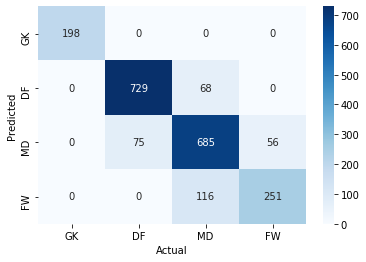

In [595]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap = 'Blues')
ax.set_xticklabels(['GK', 'DF', 'MD', 'FW'])
ax.set_yticklabels(['GK', 'DF', 'MD', 'FW'])
ax.set_ylabel('Predicted');
ax.set_xlabel('Actual')

We can now see that the random forest classifier model now has a marginally better f-score and accuracy than the KNN model

## Analysis of Results

Given that the random forest decision tree classifier model with 200 trees generated the best f-score and accuracy, this would be the best model to use to predict a player's position from the data we have at hand.

From the confusion matrix above, we can see that the model perfectly predicted all goalkeepers as goalkeepers which is unsurprising given the vastly different skill attributes required for this position. However, where the model sturggles is distinguishing between defenders and midfielders and between midfielders and forwards. This is also somewhat to be expected given the variation in playstyles between the different types of defenders and midfielders. For example, full-backs and wing-backs are more attacking focused and therefore more likely to share similar attributes to midfielders, whereas central defenders and central defensive midfielders may share more similar attributes. 

## Next Steps

Given that the random forest decision tree classifier model had the best f-score and accuracy, we could have optimised this further using boosting. However, finding the best parameters would have been fairly time-consuming. 

We could have also created more sub-groups rather than splitting the player positions into GK, DF, MD and FW to account for players from different positions that share similar attributes. One way of splitting these could have been to split the defender, midfielder, and attacker groups into central and wide defender, midfielder and attackers. 